In [1]:
!gdown --id 10aMO1oP3RV-nHjrF8a9yDhXA3JbuiWqU

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10aMO1oP3RV-nHjrF8a9yDhXA3JbuiWqU
To: /content/student_performance.zip
100% 49.7k/49.7k [00:00<00:00, 41.3MB/s]


In [2]:
import zipfile
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf

# Extract the archive
zip_ref = zipfile.ZipFile('student_performance.zip', 'r')
zip_ref.extractall('./')
zip_ref.close()

In [3]:
df = pd.read_csv('Student_Performance.csv')
print(f'Columns type before change :\n{df.dtypes}')

# Change Extracurricular columns type into int64
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No' : 0})
df['Extracurricular Activities'] = df['Extracurricular Activities'].astype(int)

print(f'\nColumns type after change \n{df.dtypes}')

X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']].values
y = df['Performance Index'].values

Columns type before change :
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

Columns type after change 
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'mean squared error : {mse}')

print(f'model koefisien : {model.coef_}')
print(f'model intercept : {model.intercept_}')

mean squared error : 4.082628398521853
model koefisien : [2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
model intercept : -33.92194621555638


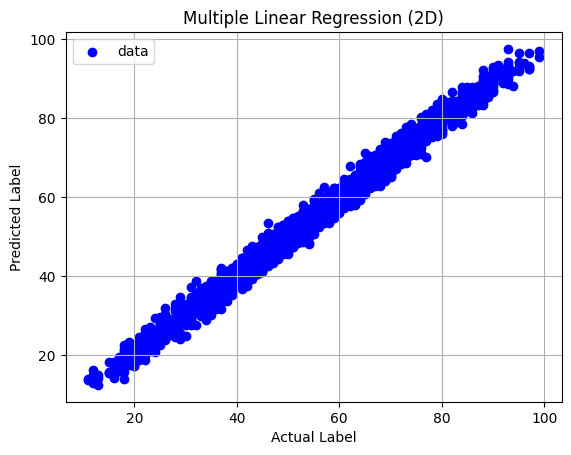

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Plot actual label vs predicted label
plt.scatter(y_test, y_pred, color='blue', label='data')

plt.title('Multiple Linear Regression (2D)')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.legend()
plt.grid(True)
plt.show()